In [176]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as snes

movies = pd.read_csv("movies.csv")

snes.set_theme(palette="pastel")

In [177]:
movies.head(2)
# movies.info()

,title,rated,released,director,runtime,genre,award_wins,award_nominations,box_office
0,Parasite,R,08 Nov 2019,Bong Joon Ho,132,"Drama, Thriller",306,264,53369749
1,Green Book,PG-13,16 Nov 2018,Peter Farrelly,130,"Biography, Comedy, Drama",58,123,85080171


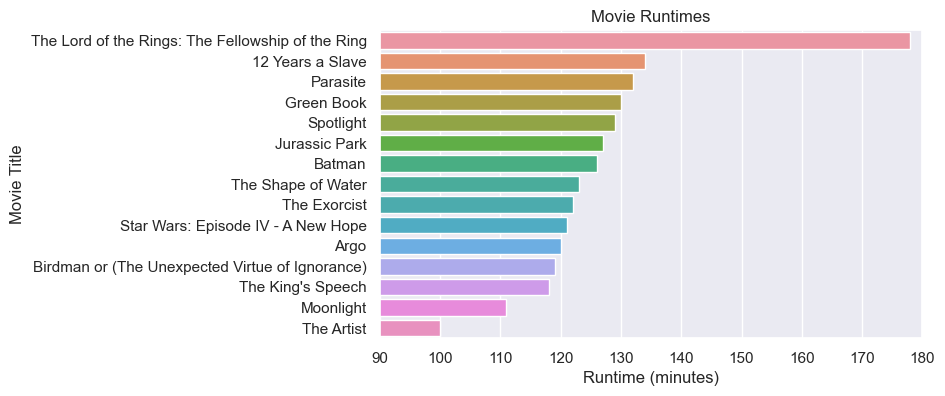

In [178]:
movie_runtimes  = movies.sort_values(by="runtime", ascending=False)
plt.figure(figsize=(7, 4))
snes.barplot(data=movie_runtimes, x="runtime", y="title")
plt.xlim(90, 180)
plt.xlabel("Runtime (minutes)")
plt.ylabel("Movie Title")
plt.title("Movie Runtimes")
plt.show()

In [179]:
# movie_runtimes.head(1)

### What movie had the longest runtime?
Answer - "TLOTR: The Fellowship of the Ring" had the longest runtime reaching 178 minutes.

_To reach this answer I sorted the dataframe by "runtime" and set it's listed them longest to shortest._
___

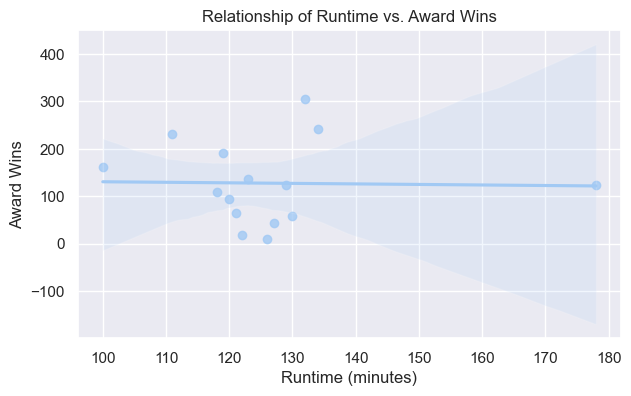

In [180]:
plt.figure(figsize=(7, 4))
snes.regplot(data=movie_runtimes, x="runtime", y="award_wins")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Award Wins")
plt.title("Relationship of Runtime vs. Award Wins")
plt.show()

### Is there any relationship between the length of the movie and the number of awards a movie won?

As seen in the scatterplot above, there is no direct correlation between movie runtime and winning awards. Though most movies are between 120-130 minutes and won 50-150 awards.

_For this I simply made a scatterplot with the runtime on the X and the award wins on the Y_
___

<Figure size 700x400 with 0 Axes>

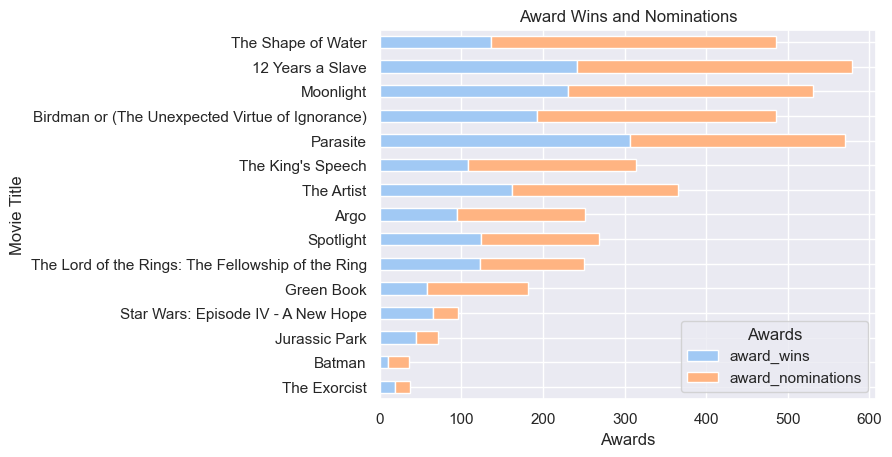

In [182]:
awards = ["title", "award_wins", "award_nominations"]
awards_dataframe = movies[awards]
awards_dataframe = awards_dataframe.sort_values(by="award_nominations", ascending=True)
awards_dataframe.set_index("title", inplace=True)
plt.figure(figsize=(7, 4))
awards_dataframe.plot(kind="barh", stacked=True)
plt.xlabel("Awards")
plt.ylabel("Movie Title")
plt.title("Award Wins and Nominations")
plt.legend(title="Awards", loc="lower right")
plt.show()

### How many awards and nominations did each movie receive?

Answer: The movie "Parasite" won the most awards with just over 300. Poor "Batman" came in last.

_To do this I created a new dataframe with just the title, award wins and award nominations. I was then able to create a stacked horizontal bar chart to show the data_

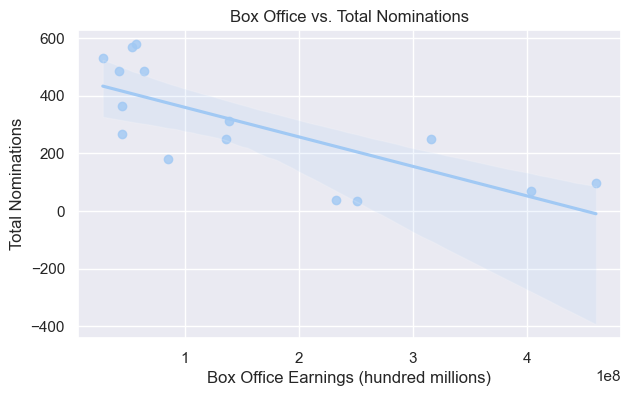

In [ ]:
movies["total_nominations"] = movies["award_wins"] + movies["award_nominations"]

plt.figure(figsize=(7, 4))
snes.regplot(data=movies, x="box_office", y="total_nominations")
plt.xlabel("Box Office Earnings (hundred millions)")
plt.ylabel("Total Nominations")
plt.title("Box Office vs. Total Nominations")
plt.show()

### Is there a relationship between the amount of box office earnings a movie had and the amount of total nominations the movie received?

Answer: There is a slightly negative relationship between box office earnings and total award nominations.

_First I had to add the nominations and wins together and add this as a new column to the dataset. I was then able to make a scatterplot with box office earnings on the X and total nominations on the Y_

___

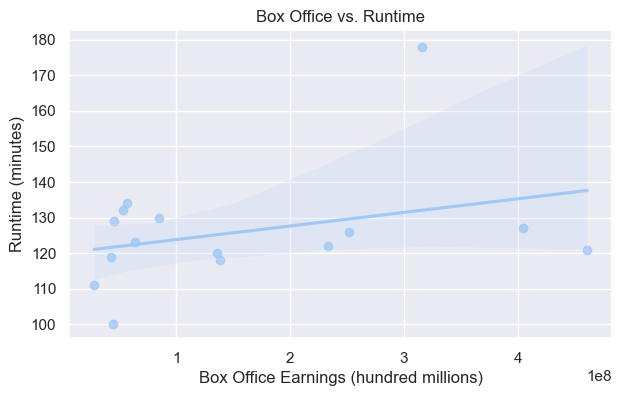

In [ ]:
plt.figure(figsize=(7, 4))
snes.regplot(data=movies, x="box_office", y="runtime")
plt.xlabel("Box Office Earnings (hundred millions)")
plt.ylabel("Runtime (minutes)")
plt.title("Box Office vs. Runtime")
plt.show()

### Is there a relationship between box office earnings and runtimes?

Answer: It appears there is a slightly positive relationship between how long a movie is and how much money it pulls in at the box office.

_For this I simply made a scatter plot with box office earnings on the X and runtime on the Y_
___

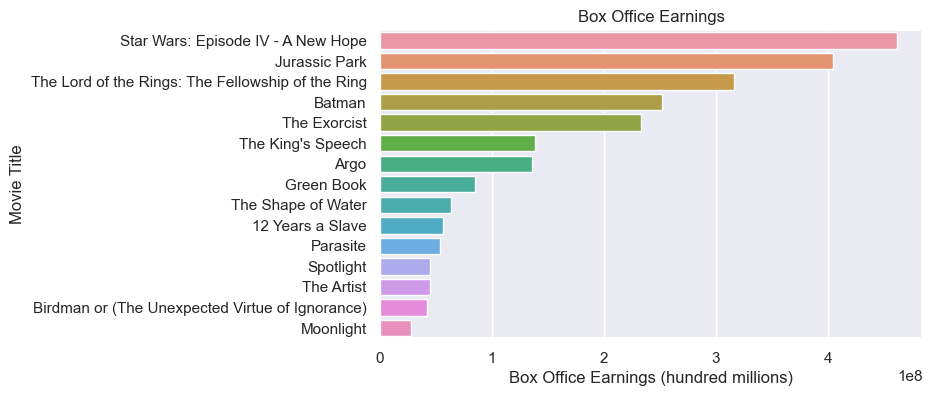

In [ ]:
earnings = ["title", "box_office"]
titles_and_mulah = movies[earnings].sort_values(by="box_office", ascending=False)
plt.figure(figsize=(7, 4))
snes.barplot(data=titles_and_mulah, x="box_office", y="title")
plt.xlabel("Box Office Earnings (hundred millions)")
plt.ylabel("Movie Title")
plt.title("Box Office Earnings")
plt.show()


### How much did each movie earn at the box office?

Answer: STAR WARS FTW!

_For this I created a dataframe with just the title and the box office earnings and created a horizontal bar chart to display the results._
___

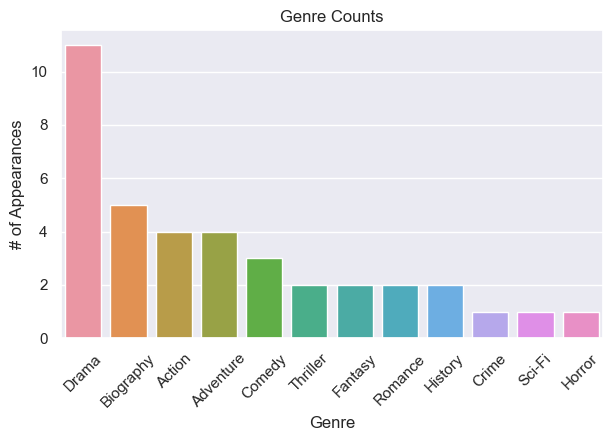

In [ ]:
movies["genre"] = movies["genre"].str.split(", ")
all_genres = [genre for genres_list in movies["genre"] for genre in genres_list]
genre_counts = pd.Series(all_genres).value_counts().reset_index()
genre_counts.columns = ["Genre", "Count"]
genre_counts

plt.figure(figsize=(7, 4))
snes.barplot(data=genre_counts, x="Genre", y="Count")
plt.xlabel("Genre")
plt.ylabel("# of Appearances")
plt.title("Genre Counts")
plt.xticks(rotation=45)
plt.show()

### What is the total count of each genre present in the dataset?

Answer: Drama definitely shows up more than any other genre. Horror only showed up once 😭

_I had to first split the value in each "Genre" column because they had multiple values and turn it into a list. From there I was able to create a new series from the value counts of each genre._